In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np

In [2]:
url_credit_card = 'https://stepik.org/media/attachments/course/76/credit_card__1_.csv'
url_titanic = 'https://stepik.org/media/attachments/course/76/titanik_full_data_1.csv'
url_wine_quality = 'https://stepik.org/media/attachments/course/76/winequality-red.csv '

In [5]:
data_cc = pd.read_csv(url_credit_card)
data_cc.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.50,0.004156,15.000000,yes,no,4,58,1,5


In [8]:
data_titanic = pd.read_csv(url_titanic, sep='\t')
data_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
data_wq = pd.read_csv(url_wine_quality, sep=';')
data_wq.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Биноминальная регрессия

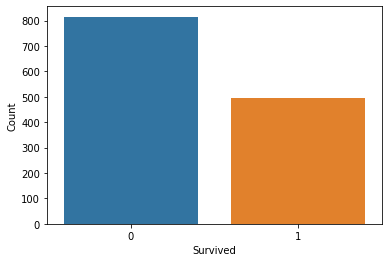

In [16]:
sns.countplot(x = 'Survived', data=data_titanic)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [18]:
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', data_titanic,family=sm.families.Binomial()).fit()

In [19]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Thu, 28 Apr 2022   Deviance:                       796.42
Time:                        12:07:23   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

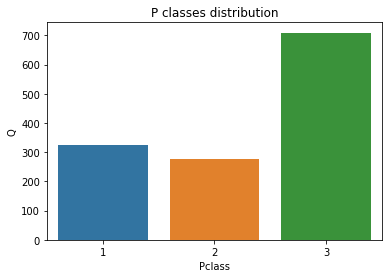

In [22]:
sns.countplot(x='Pclass', data=data_titanic)
plt.xlabel('Pclass')
plt.ylabel('Q')
plt.title('P classes distribution')
plt.show()

In [24]:
multi_res = sf.mnlogit('Pclass ~ C(Sex)+Age', data_titanic).fit()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


In [25]:
multi_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.1028
Time:                        12:41:31   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

In [28]:
from bevel.linear_ordinal_regression import OrderedLogit

In [29]:
data_wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


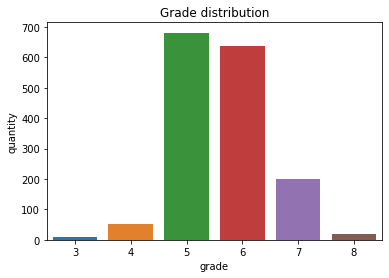

In [31]:
sns.countplot(x='quality', data=data_wq)
plt.xlabel('grade')
plt.ylabel('quantity')
plt.title('Grade distribution')
plt.show()

In [33]:
y = data_wq['quality']
X = data_wq.drop('quality', axis=1)

In [34]:
ol = OrderedLogit()

In [35]:
ol.fit(X,y)

In [36]:
ol.print_summary()

n=1599
                         beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                            
fixed acidity          0.1284    0.0823 0.1188     -0.0329      0.2898     
volatile acidity      -3.3957    0.4031 0.0000     -4.1857     -2.6058  ***
citric acid           -0.8022    0.4622 0.0827     -1.7081      0.1038    .
residual sugar         0.0878    0.0480 0.0670     -0.0062      0.1818    .
chlorides             -5.1416    1.3595 0.0002     -7.8062     -2.4770  ***
free sulfur dioxide    0.0137    0.0068 0.0444      0.0003      0.0270    *
total sulfur dioxide  -0.0111    0.0024 0.0000     -0.0158     -0.0065  ***
density              -76.5142   68.3658 0.2631   -210.5087     57.4802     
pH                    -0.8469    0.6009 0.1587     -2.0246      0.3309     
sulphates              2.9016    0.3675 0.0000      2.1814      3.6218  ***
alcohol                0.8308    0.0852 0.0000      0.6637      0.9978  ***
---
S

In [37]:
data_cc.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


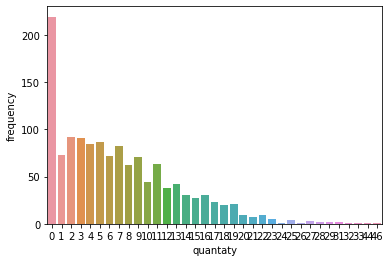

In [38]:
sns.countplot(x='active', data=data_cc)
plt.xlabel('quantaty')
plt.ylabel('frequency')
plt.show()

### Модель Пуассона

In [41]:
pois = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)',\
              family=sm.families.Poisson(), data=data_cc).fit()

In [42]:
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Thu, 28 Apr 2022   Deviance:                       7142.4
Time:                        13:37:32   Pearson chi2:                 6.89e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

посчитаем сверхдисперсию:

In [43]:
pois.pearson_chi2/pois.df_resid

5.249939996924247

для модели Пуассона это значение должно быть близко к 1. Нужно другое распределение.

### Отрицательное биномиальное

In [45]:
neg = sf.glm('active ~ age+income+expenditure+C(owner)+C(selfemp)', data=data_cc,\
            family=sm.families.NegativeBinomial(alpha=0.15)).fit()

In [47]:
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Thu, 28 Apr 2022   Deviance:                       3940.9
Time:                        13:44:24   Pearson chi2:                 3.44e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

In [48]:
neg.pearson_chi2/neg.df_resid

2.6196780724869027

Сравним модели с помощью информационного критерия Акаике (AIC)
- его абсолютное занчение ничего не значит, полезен только для сравнения моделей
- чем он ниже, тем лучше модель

In [49]:
print(pois.aic)
print(neg.aic)

11240.817775454601
8870.632884339047


### Регрессия с избытком нулей

In [51]:
data_cc['owner'] = np.where(data_cc['owner']=='yes', 1, 0)
data_cc['selfemp'] = np.where(data_cc['selfemp']=='yes', 1, 0)

In [52]:
y = data_cc['active']
X = data_cc.loc[:,['owner', 'selfemp', 'age', 'income', 'expenditure']]
X = sm.add_constant(X)

In [53]:
zeroinf = sm.ZeroInflatedGeneralizedPoisson(y, X).fit(maxiter=100, method='ncg')

/Users/evgeny_kolomiets/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1090: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/evgeny_kolomiets/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1267: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/Users/evgeny_kolomiets/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1268: RuntimeWarning: overflow encountered in multiply
  return (self.endog - L)[:,None] * X
/Users/evgeny_kolomiets/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1268: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
/Users/evgeny_kolomiets/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:861: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/Users/evgeny_kol

Optimization terminated successfully.
         Current function value: 3.259985
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 5


In [54]:
zeroinf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    ZeroInflatedGeneralizedPoisson Regression Results                     
==========================================================================================
Dep. Variable:                             active   No. Observations:                 1319
Model:             ZeroInflatedGeneralizedPoisson   Df Residuals:                     1313
Method:                                       MLE   Df Model:                            5
Date:                            Thu, 28 Apr 2022   Pseudo R-squ.:                -0.09731
Time:                                    13:54:55   Log-Likelihood:                -4299.9
converged:                                   True   LL-Null:                       -3918.6
Covariance Type:                        nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0997      0.055      1.802      0.072      -0.009       0.208
const             1.7967      0.073     24.531      0.000       1.653       1.940
owner             0.0017      0.044      0.037      0.970      -0.085       0.089
selfemp           0.0008      0.075      0.011      0.991      -0.146       0.148
age               0.0090      0.002      4.135      0.000       0.005       0.013
income            0.0019      0.013      0.147      0.883      -0.023       0.027
expenditure       0.0001   7.65e-05      1.425      0.154   -4.09e-05       0.000
alpha             0.1009      0.005     20.693      0.000       0.091       0.110
=================================================================================
"""

In [57]:
print(pois.aic, neg.aic, zeroinf.aic)

11240.817775454601 8870.632884339047 8611.841542689841


### Отрицательное биномиальное

In [58]:
zeroinf_2 = sm.ZeroInflatedNegativeBinomialP(y, X).fit(maxiter=100, method='ncg')

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


In [59]:
zeroinf_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Thu, 28 Apr 2022   Pseudo R-squ.:                -0.03018
Time:                                   13:58:48   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

In [60]:
print(pois.aic, neg.aic, zeroinf.aic, zeroinf_2.aic)

11240.817775454601 8870.632884339047 8611.841542689841 8073.499916742932


### Accelerated failure time model (AFT)

In [61]:
data_ibm = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [62]:
data_ibm.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
import lifelines as lf

In [65]:
churn = data_ibm.loc[:,['Churn', 'tenure', 'SeniorCitizen', 'Dependents', 'MonthlyCharges','PaperlessBilling']]

In [66]:
churn.head()

,Churn,tenure,SeniorCitizen,Dependents,MonthlyCharges,PaperlessBilling
0,No,1,0,No,29.85,Yes
1,No,34,0,No,56.95,No
2,Yes,2,0,No,53.85,Yes
3,No,45,0,No,42.30,No
4,Yes,2,0,No,70.70,Yes


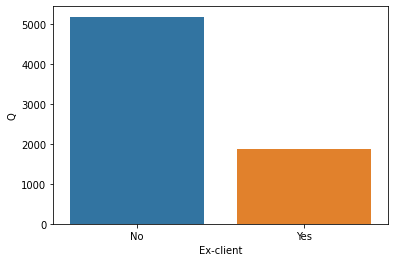

In [67]:
sns.countplot(x='Churn', data = churn)
plt.xlabel('Ex-client')
plt.ylabel('Q')
plt.show()

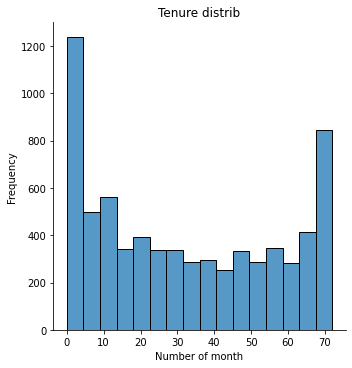

In [69]:
sns.displot(churn['tenure'], kde=False)
plt.xlabel('Number of month')
plt.ylabel('Frequency')
plt.title('Tenure distrib')
plt.show()

In [70]:
churn['tenure'] = churn['tenure'] + 0.001
churn['Churn'] = np.where(churn['Churn']=='yes', 1, 0)
churn['SeniorCitizen'] = np.where(churn['SeniorCitizen']==1, 'yes', 'no')

In [71]:
surv = lf.WeibullAFTFitter()

In [72]:
surv.fit(df=churn, duration_col = 'tenure', event_col = 'Churn',\
        formula = 'C(SeniorCitizen)+C(Dependents)+MonthlyCharges+C(PaperlessBilling)')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 7043 right-censored observations>

In [73]:
surv.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 7043 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 0
           log-likelihood = -0.00
         time fit was run = 2022-04-28 21:29:06 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                          
lambda_ Intercept                    9.28   10748.98    1838.50         -3594.11          3612.67                 0.00                  inf
        C(Dependents)[T.Yes]         0.41       1.51    1026.38         -2011.26          2012.08                 0.00                  inf
        C(PaperlessBilling)[T.Yes]   0.59       1.80    1741.81         -3413.31          3414.48                 0.00                  inf
        C(SeniorCitizen)[T.yes]      0.29       1.34    2468.41         -4837.71          4838.30                 0.00                  inf
        MonthlyCharges               0.02       1.02      35.80           -70.15            70.19                 0.00             3.03e+30
rho_    Intercept                    1.29       3.62     316.34          -618.73           621.30                 0.00            6.71e+269

                                      z    p   -log2(p)
param   covariate                                      
lambda_ Intercept                  0.01 1.00       0.01
        C(Dependents)[T.Yes]       0.00 1.00       0.00
        C(PaperlessBilling)[T.Yes] 0.00 1.00       0.00
        C(SeniorCitizen)[T.yes]    0.00 1.00       0.00
        MonthlyCharges             0.00 1.00       0.00
rho_    Intercept                  0.00 1.00       0.00
---
Concordance = 0.50
AIC = 12.00
log-likelihood ratio test = -0.00 on 4 df
-log2(p) of ll-ratio test = -0.00